# Course-End Project: Sales Analysis

## Project Statement:
AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. 
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
Determine the states that are generating the highest revenues and
Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year. 

## Perform the following steps:
As a data scientist, you must perform the following main steps on the enclosed data.
- Data Wrangling
- Data Analysis
- Data Visualization and
- Report Generation


In [130]:
# Import libraries needed

import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# Create a data frame from the csv provided

df = pd.read_excel('1688639662_ausapparalsales4thqrt2020.xlsx')
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


Preliminary investigation to understand the data.

In [175]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [176]:
df.shape

(7560, 6)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [178]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

### Observations
- There are 7560 rows and 6 columns
- Column headers are 'Date', 'Time', 'State', 'Group', 'Unit', 'Sales'
- The datatypes are as follows: 'Date': datetime64[ns]; 'Time', 'State', 'Group' : object; 'Unit', 'Sales' : int64 
- The average units are 18.005423 and the average sales are 45013.558201

## Data Wrangling
- Ensure that the data is clean and that there is no missing or incorrect data. 
- Inspect the data manually for missing/incorrect data using the functions isna(), and notna().
- Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).


In [179]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [180]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

#### Observations
- There are no null values to correct
- If there were more then 2 missing data elements for a row recommend to drop those rows using dropna(thresh=2)

### Data Normalization

#### Recommended approach
Use data normalization because the features 'Unit' and 'Sales' have vastly different ranges

In [138]:
from sklearn.preprocessing import MinMaxScaler

In [139]:
data = df[['Unit','Sales']]

In [140]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

Data is now presented on a scale between 0 and 1.

### Grouping


<Axes: xlabel='Date'>

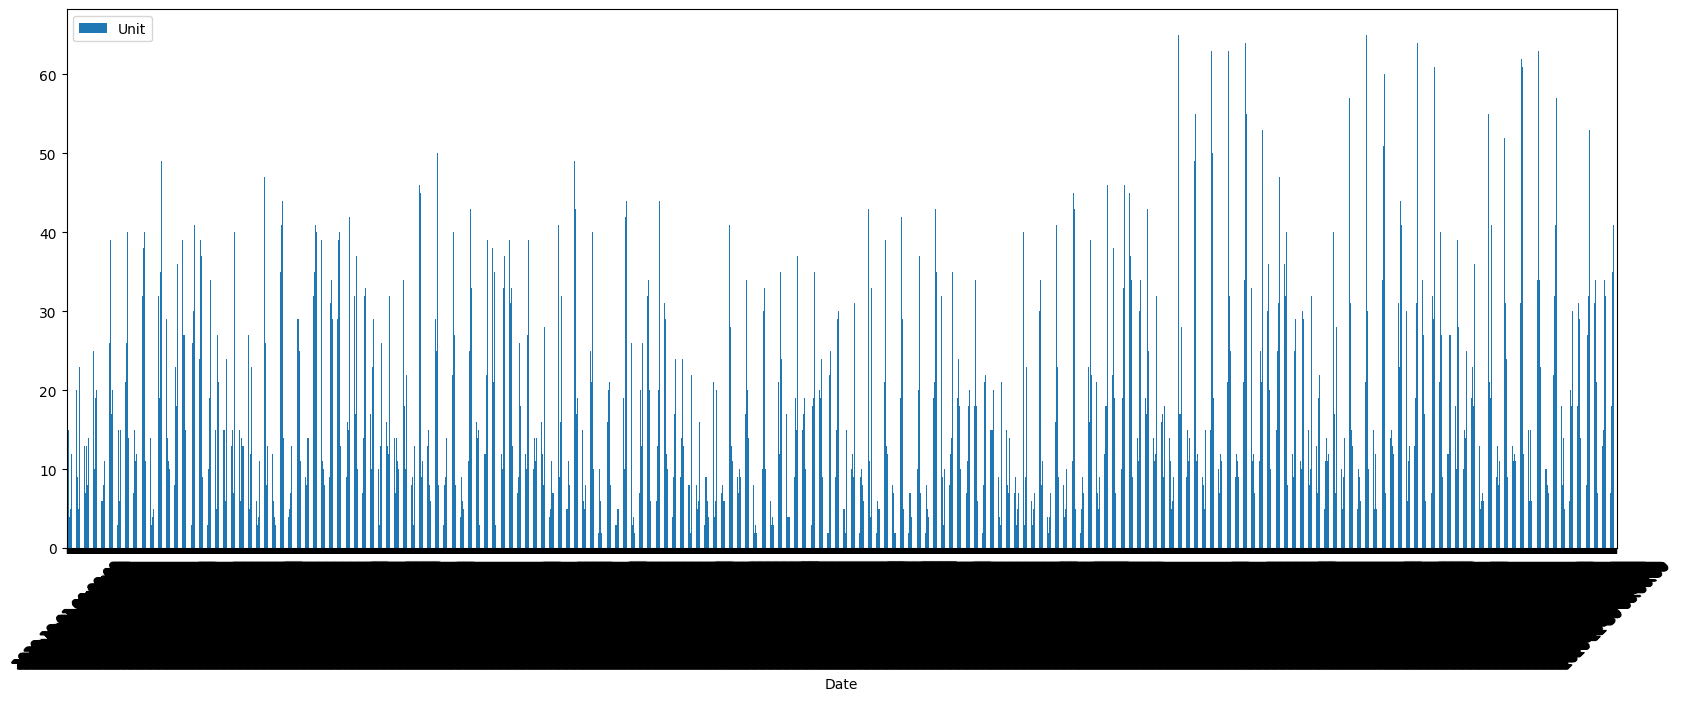

In [220]:
df.plot(kind='bar', x='Date',y='Unit', figsize=(20,7), rot=45)


#### Observation
- Daily 'Date' is too granular to interpret visualually; better to aggragate the data

In [185]:
df.set_index('Date', inplace=True, drop=False)
df


,Date,Time,State,Group,Unit,Sales
Date,,,,,,
2020-10-01,2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,2020-10-01,Morning,WA,Men,8,20000
2020-10-01,2020-10-01,Morning,WA,Women,4,10000
2020-10-01,2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
2020-12-30,2020-12-30,Afternoon,TAS,Seniors,14,35000
2020-12-30,2020-12-30,Evening,TAS,Kids,15,37500
2020-12-30,2020-12-30,Evening,TAS,Men,15,37500


In [229]:
# Group by monthly
df_monthly = df[['Unit', 'Sales']].resample('m').sum()
df_monthly.head()

,Unit,Sales
Date,,
2020-10-31,45716,114290000
2020-11-30,36273,90682500
2020-12-31,54132,135330000


#### Observation
- Monthly is not granular enough

In [227]:
# Show Unit grouped by weekly

df_weekly = df[['Unit', 'Sales']].resample('w').sum()
df_weekly


,Unit,Sales
Date,,
2020-10-04,6018,15045000
2020-10-11,10801,27002500
2020-10-18,10656,26640000
2020-10-25,10726,26815000
2020-11-01,8723,21807500
2020-11-08,8346,20865000
2020-11-15,8469,21172500
2020-11-22,8445,21112500
2020-11-29,8591,21477500


#### Recomendation
- Grouping weekly provides enough granularity and also provides a meaningful visual representation of the data

## Data Analysis
Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.). 
Determine which group is generating the highest sales, and which group is generating the lowest sales.
Determine which state is generating the highest sales, and which state is generating the lowest sales.
Generate weekly, monthly and quarterly reports for the analysis made.
(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)

In [189]:
# Get the mean, media, standard deviation and other calculations for the 'Sales' and 'Unit' columns

df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7560 entries, 2020-10-01 to 2020-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 413.4+ KB


In [194]:
# Show totals by 'Group' to determine highest sales by group
df_salesbygroup = df.groupby(['Group'])[['Unit', 'Sales']].sum()
df_salesbygroup

,Unit,Sales
Group,,
Kids,34029,85072500
Men,34300,85750000
Seniors,33615,84037500
Women,34177,85442500


In [195]:
# Show totals by 'State' to determine highest sales by state

df_salesbystate = df.groupby(['State'])[['Unit', 'Sales']].sum()
df_salesbystate

,Unit,Sales
State,,
NSW,29988,74970000
NT,9032,22580000
QLD,13367,33417500
SA,23543,58857500
TAS,9104,22760000
VIC,42226,105565000
WA,8861,22152500


#### Observations
- Men are the highest Sales Group with total Sales of 85750000
- VIC is the highest Sales State with total Sales of 105565000
- Seniors are the lowest Sales Group with total Sales of 84037500
- WA is the lowest Sales State with total Sales of 22152500

## Data Visualization
Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like:  
- State-wise sales analysis for different groups (kids, women, men, and seniors) 
- Group-wise sales analysis (kids, women, men, and seniors) across different states.
- Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].

The dashboard must contain daily, weekly, monthly and quarterly charts.

 (Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)

Include your recommendation, and indicate why you are choosing the recommended visualization package.

## Report Generation 
Use JupyterLab Notebook for report generation (wrangling, analysis and visualization) 

Please note that JupyterLab allows you to mix code with graphs and plots etc.
Use Markdown in suitable places, while presenting your report. 
The report should contain suitable graphs, plots and analysis reports, and recommendations. Please note that different aspects of analysis demand different graphs/plots. 

Use box plot for descriptive statistics

Use Seaborn distribution plot for any other statistical plotting.

/var/folders/x6/rw23hkp16k3bq3_s0frsrx280000gn/T/ipykernel_32388/455173451.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45)


[Text(0, 0, '2020-10-04'),
 Text(1, 0, '2020-10-11'),
 Text(2, 0, '2020-10-18'),
 Text(3, 0, '2020-10-25'),
 Text(4, 0, '2020-11-01'),
 Text(5, 0, '2020-11-08'),
 Text(6, 0, '2020-11-15'),
 Text(7, 0, '2020-11-22'),
 Text(8, 0, '2020-11-29'),
 Text(9, 0, '2020-12-06'),
 Text(10, 0, '2020-12-13'),
 Text(11, 0, '2020-12-20'),
 Text(12, 0, '2020-12-27'),
 Text(13, 0, '2021-01-03')]

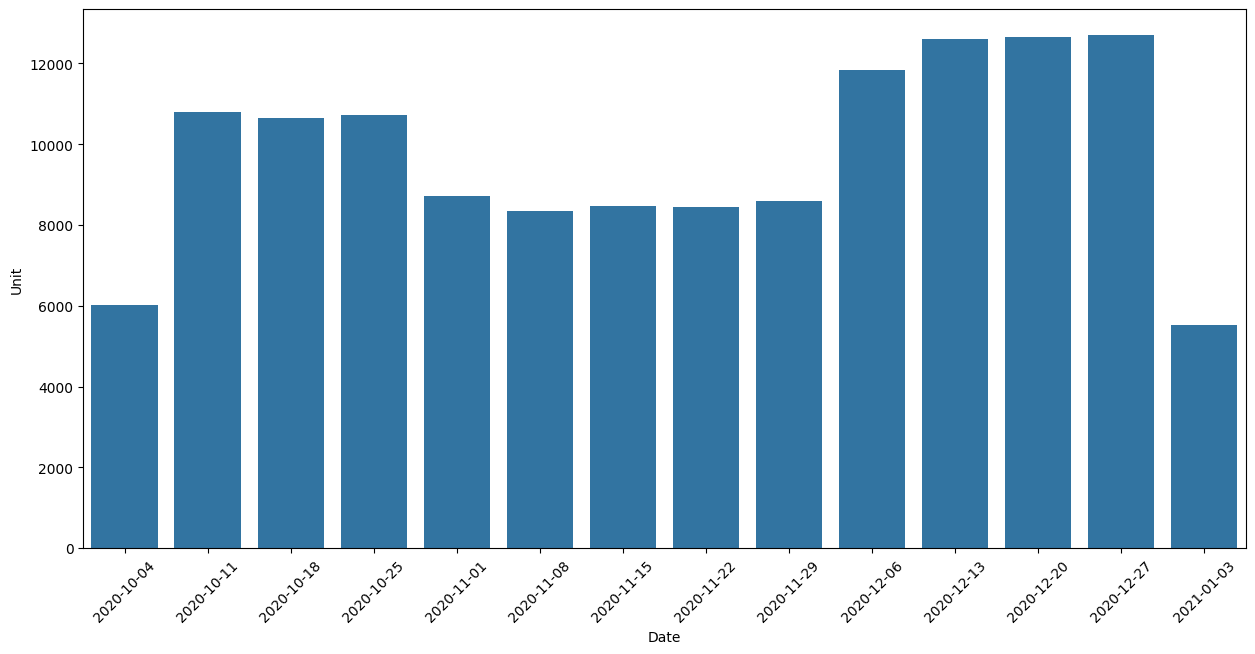

In [225]:
# Using Seaborn for visualization, since it supports statistical analysis and is helpful for machine learning tasks.
# Choosing to show weekly, monthly data as was noted before, daily is too granular, while quarterly is too broad.

plt.figure(figsize=(15,7))
myplot = sns.barplot(x=df_weekly.index, y=df_weekly['Unit'])
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45)

/var/folders/x6/rw23hkp16k3bq3_s0frsrx280000gn/T/ipykernel_32388/2384440502.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45)


[Text(0, 0, '2020-10-04'),
 Text(1, 0, '2020-10-11'),
 Text(2, 0, '2020-10-18'),
 Text(3, 0, '2020-10-25'),
 Text(4, 0, '2020-11-01'),
 Text(5, 0, '2020-11-08'),
 Text(6, 0, '2020-11-15'),
 Text(7, 0, '2020-11-22'),
 Text(8, 0, '2020-11-29'),
 Text(9, 0, '2020-12-06'),
 Text(10, 0, '2020-12-13'),
 Text(11, 0, '2020-12-20'),
 Text(12, 0, '2020-12-27'),
 Text(13, 0, '2021-01-03')]

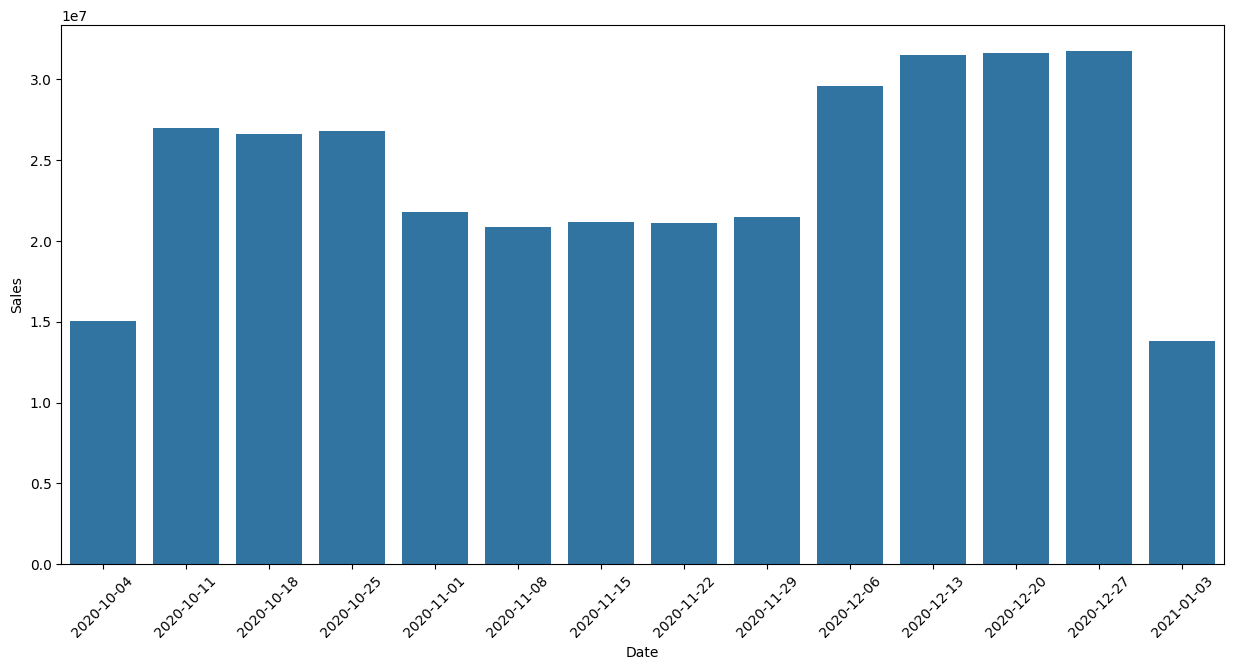

In [230]:
plt.figure(figsize=(15,7))
myplot = sns.barplot(x=df_weekly.index, y=df_weekly['Sales'])
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45)

In [231]:
# Creating a series of dataframes grouping by month

df_oct = df.loc['2020-10-01':'2020-10-31']
df_oct

,Date,Time,State,Group,Unit,Sales
Date,,,,,,
2020-10-01,2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,2020-10-01,Morning,WA,Men,8,20000
2020-10-01,2020-10-01,Morning,WA,Women,4,10000
2020-10-01,2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
2020-10-30,2020-10-30,Afternoon,TAS,Seniors,12,30000
2020-10-30,2020-10-30,Evening,TAS,Kids,15,37500
2020-10-30,2020-10-30,Evening,TAS,Men,7,17500


In [ ]:
df_nov = df.loc['2020-11-01':'2020-11-30']
df_nov

,Date,Time,State,Group,Unit,Sales
Date,,,,,,
2020-11-01,2020-11-01,Morning,WA,Kids,4,10000
2020-11-01,2020-11-01,Morning,WA,Men,6,15000
2020-11-01,2020-11-01,Morning,WA,Women,4,10000
2020-11-01,2020-11-01,Morning,WA,Seniors,7,17500
2020-11-01,2020-11-01,Afternoon,WA,Kids,8,20000
...,...,...,...,...,...,...
2020-11-30,2020-11-30,Afternoon,TAS,Seniors,9,22500
2020-11-30,2020-11-30,Evening,TAS,Kids,9,22500
2020-11-30,2020-11-30,Evening,TAS,Men,10,25000


In [ ]:
df_dec = df.loc['2020-12-01':'2020-12-31']
df_dec

,Date,Time,State,Group,Unit,Sales
Date,,,,,,
2020-12-01,2020-12-01,Morning,WA,Kids,9,22500
2020-12-01,2020-12-01,Morning,WA,Men,11,27500
2020-12-01,2020-12-01,Morning,WA,Women,15,37500
2020-12-01,2020-12-01,Morning,WA,Seniors,13,32500
2020-12-01,2020-12-01,Afternoon,WA,Kids,13,32500
...,...,...,...,...,...,...
2020-12-30,2020-12-30,Afternoon,TAS,Seniors,14,35000
2020-12-30,2020-12-30,Evening,TAS,Kids,15,37500
2020-12-30,2020-12-30,Evening,TAS,Men,15,37500


[Text(0.5, 1.0, 'December')]

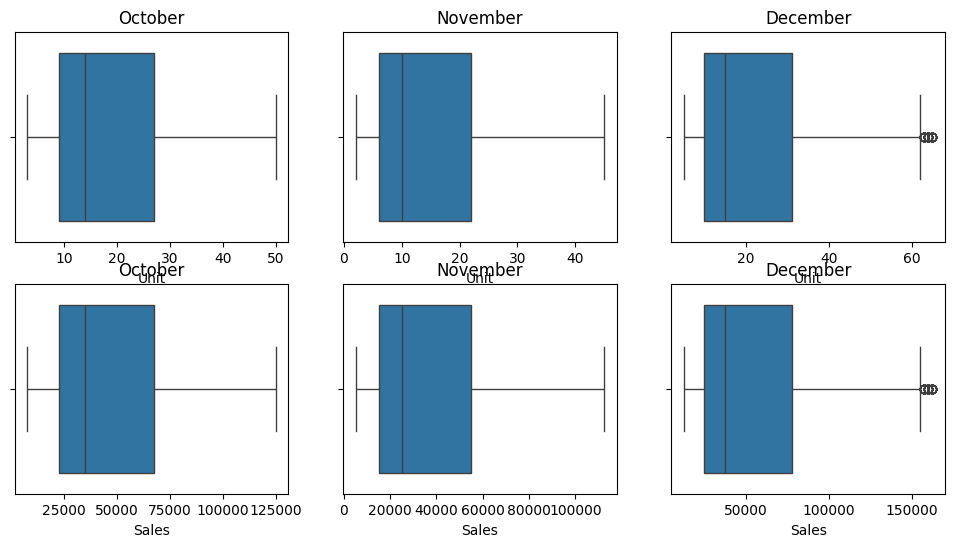

In [218]:
# Displaying monthly box plots to compare monthly Sales and Units.

fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(12,6))
sns.boxplot(data=df_oct, x='Unit', ax=axs[0,0]).set(title='October')
sns.boxplot(data=df_nov, x='Unit', ax=axs[0,1]).set(title='November')
sns.boxplot(data=df_dec, x='Unit', ax=axs[0,2]).set(title='December')
sns.boxplot(data=df_oct, x='Sales', ax=axs[1,0]).set(title='October')
sns.boxplot(data=df_nov, x='Sales', ax=axs[1,1]).set(title='November')
sns.boxplot(data=df_dec, x='Sales', ax=axs[1,2]).set(title='December')




<Axes: xlabel='State', ylabel='Sales'>

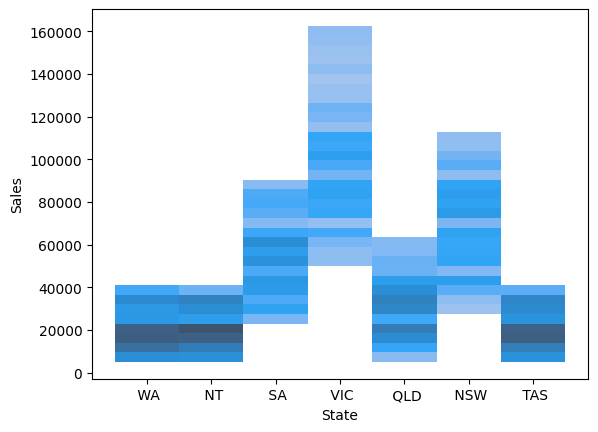

In [232]:
# Displaying Sales by state; the heatmap histogram shows sales concentrated at the lower end of the distribution

sns.histplot(data=df,x='State', y='Sales')

In [207]:
# Creating a pivot table to display Groups with State-wise Units & Sales

df_pivotgroup = pd.pivot_table(df, values=['Sales', 'Unit'], index=['Group', 'State'], aggfunc='sum')
df_pivotgroup

Sales   Unit
Group    State                 
 Kids     NSW   18587500   7435
          NT     5700000   2280
          QLD    8510000   3404
          SA    14515000   5806
          TAS    5775000   2310
          VIC   26360000  10544
          WA     5625000   2250
 Men      NSW   19022500   7609
          NT     5762500   2305
          QLD    8392500   3357
          SA    14655000   5862
          TAS    5757500   2303
          VIC   26407500  10563
          WA     5752500   2301
 Seniors  NSW   18187500   7275
          NT     5465000   2186
          QLD    8190000   3276
          SA    14717500   5887
          TAS    5650000   2260
          VIC   26315000  10526
          WA     5512500   2205
 Women    NSW   19172500   7669
          NT     5652500   2261
          QLD    8325000   3330
          SA    14970000   5988
          TAS    5577500   2231
          VIC   26482500  10593
          WA     5262500   2105

<Axes: xlabel='Group,State'>

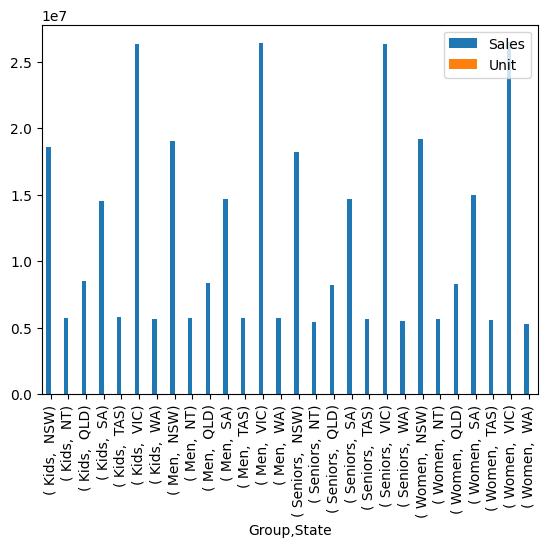

In [223]:
# Displaying Sales and Units by Group & State

df_pivotgroup.plot(kind='bar')

In [208]:
# Creating a pivot table to display States with Group-wise Sales & Units.

df_pivotstate = pd.pivot_table(df, values=['Sales', 'Unit'], index=['State', 'Group'], aggfunc='sum')
df_pivotstate

Sales   Unit
State Group                    
 NSW   Kids     18587500   7435
       Men      19022500   7609
       Seniors  18187500   7275
       Women    19172500   7669
 NT    Kids      5700000   2280
       Men       5762500   2305
       Seniors   5465000   2186
       Women     5652500   2261
 QLD   Kids      8510000   3404
       Men       8392500   3357
       Seniors   8190000   3276
       Women     8325000   3330
 SA    Kids     14515000   5806
       Men      14655000   5862
       Seniors  14717500   5887
       Women    14970000   5988
 TAS   Kids      5775000   2310
       Men       5757500   2303
       Seniors   5650000   2260
       Women     5577500   2231
 VIC   Kids     26360000  10544
       Men      26407500  10563
       Seniors  26315000  10526
       Women    26482500  10593
 WA    Kids      5625000   2250
       Men       5752500   2301
       Seniors   5512500   2205
       Women     5262500   2105

<Axes: xlabel='State,Group'>

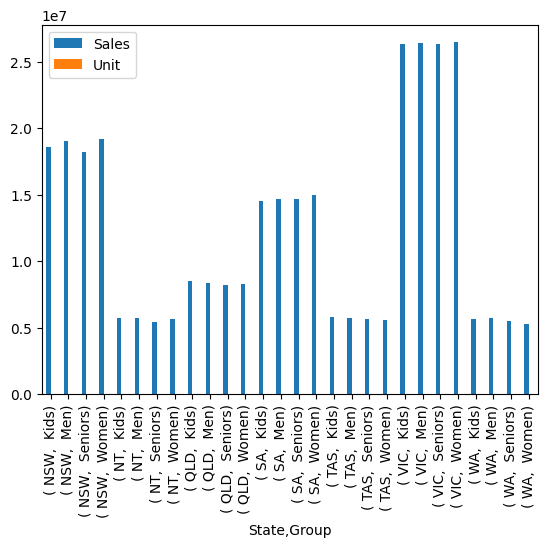

In [213]:
# Displayin Sales by States & Groups.

df_pivotstate.plot(kind='bar')

In [215]:
df_salesbytime = df.groupby(['Time'])[['Unit', 'Sales']].sum()
df_salesbytime

,Unit,Sales
Time,,
Afternoon,45603,114007500
Evening,44835,112087500
Morning,45683,114207500


<Axes: xlabel='Time'>

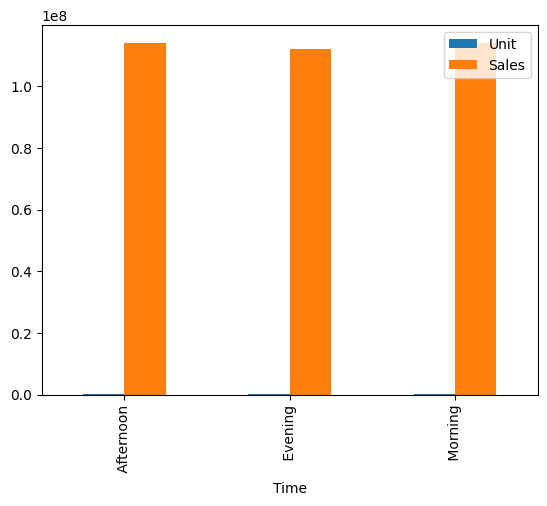

In [235]:
# Displaying Sales & Units by Time of Day.

df_salesbytime.plot(kind='bar')

### Observations
- Victoria stat has the highest sales while Tasmania, Western Australia and Northern Territories have lower sales
- Morning is the time of day with the highest sales; evening has the lowest
- The sales and unit data for each month is skewed to the right indicating a sales are concentrated at the lower end of the distribution
- The month of December has outliers, as shown in the box plot. For machine learning algorythms these outliers should be eliminated using outlier treatments like Z-score

#### Questions

For further analysis and discovery I would extend the research to request additional datasets and exploration.

- What are the populations of each state?
- What percentage of the populations for each state fit into the different groups categories?
- Are the sales volumes similar by population?
- What other population characteristics could determine sales differentials (urban, rural, incomes, etc.)?
- Is Autralian Capitol Territory included in this data?
- Is there a break down of data Tier 1 & Tier 2 cities?

Australian states map for reference.

![aus states](https://digital-classroom.nma.gov.au/sites/default/files/2020-07/Yr6_AustraliaSinceFederation_22.jpg)